# Part 1

BandPass Filter Poles (s-plane):
[ 0.44181056+0.72756144j -0.55977703+0.92182538j  0.41859889+0.56900708j
 -0.77009686+1.04680297j  0.41909524+0.45853919j -0.99696921+1.09080087j
  0.4232311 +0.37478179j -1.21571723+1.07654819j  0.42738814+0.30652485j
 -1.41835369+1.01725015j  0.43088508+0.24806074j -1.60015685+0.92121104j
  0.43365105+0.19612877j -1.75742604+0.79483678j  0.43574619+0.14866518j
 -1.88707616+0.64382094j  0.43724585+0.10424527j -1.98658592+0.4736287j
  0.43821144+0.06180419j -2.0540215 +0.28969378j  0.43868406+0.02048082j
 -2.08807088+0.09748565j  0.43868406-0.02048082j -2.08807088-0.09748565j
  0.43821144-0.06180419j -2.0540215 -0.28969378j  0.43724585-0.10424527j
 -1.98658592-0.4736287j   0.43574619-0.14866518j -1.88707616-0.64382094j
  0.43365105-0.19612877j -1.75742604-0.79483678j  0.43088508-0.24806074j
 -1.60015685-0.92121104j  0.42738814-0.30652485j -1.41835369-1.01725015j
  0.4232311 -0.37478179j -1.21571723-1.07654819j  0.41909524-0.45853919j
 -0.99696921-1.0908

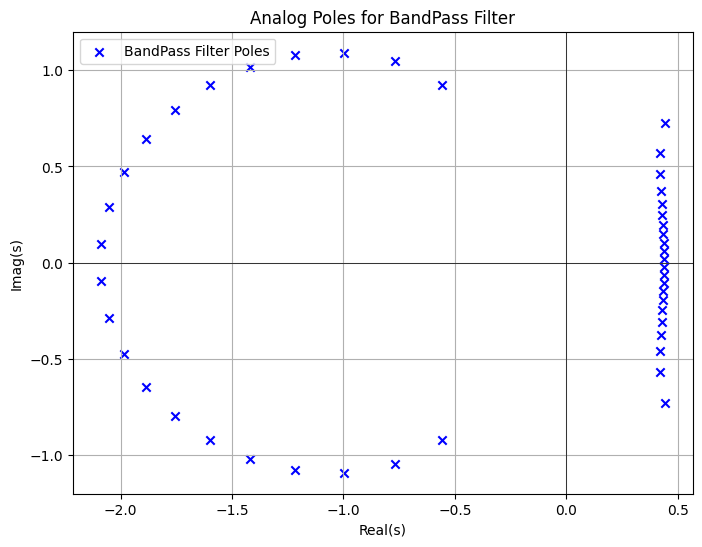

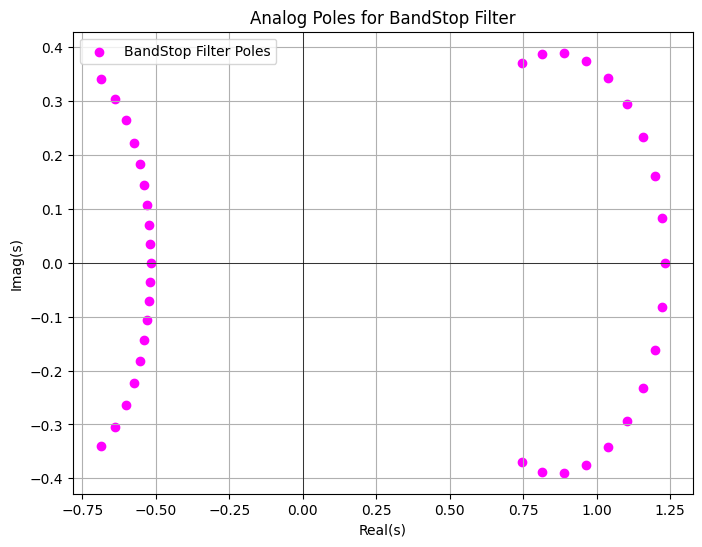


Combined Analog System Poles (s-plane):
[ 0.44181056+7.27561441e-01j -0.55977703+9.21825376e-01j
  0.41859889+5.69007084e-01j -0.77009686+1.04680297e+00j
  0.41909524+4.58539191e-01j -0.99696921+1.09080087e+00j
  0.4232311 +3.74781789e-01j -1.21571723+1.07654819e+00j
  0.42738814+3.06524849e-01j -1.41835369+1.01725015e+00j
  0.43088508+2.48060738e-01j -1.60015685+9.21211036e-01j
  0.43365105+1.96128767e-01j -1.75742604+7.94836783e-01j
  0.43574619+1.48665182e-01j -1.88707616+6.43820943e-01j
  0.43724585+1.04245269e-01j -1.98658592+4.73628698e-01j
  0.43821144+6.18041859e-02j -2.0540215 +2.89693777e-01j
  0.43868406+2.04808194e-02j -2.08807088+9.74856539e-02j
  0.43868406-2.04808194e-02j -2.08807088-9.74856539e-02j
  0.43821144-6.18041859e-02j -2.0540215 -2.89693777e-01j
  0.43724585-1.04245269e-01j -1.98658592-4.73628698e-01j
  0.43574619-1.48665182e-01j -1.88707616-6.43820943e-01j
  0.43365105-1.96128767e-01j -1.75742604-7.94836783e-01j
  0.43088508-2.48060738e-01j -1.60015685-9.2121

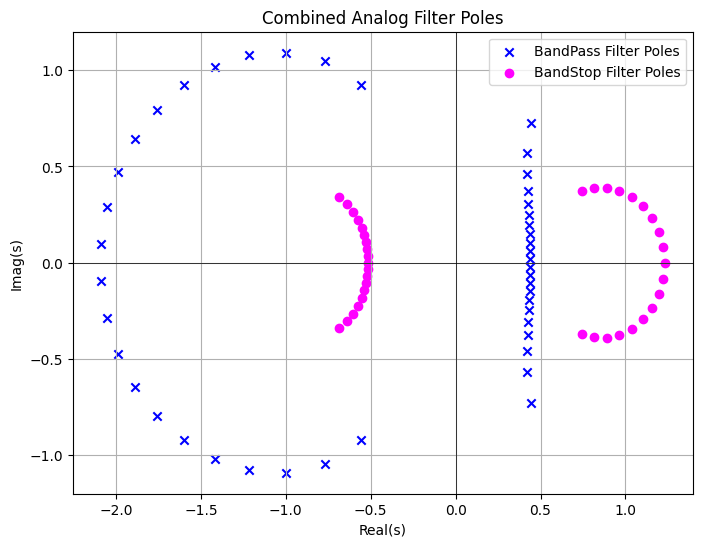

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class BandPassFilter:
    """Class for designing a BandPass filter and computing its poles."""
    
    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandpass filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))
        
        poles = np.zeros(2 * self.N, dtype=complex)
        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt((self.BandWidth * p)**2 + 4 * self.omega_0__2)
            poles[2 * i] = (self.BandWidth * p + sqrt_term) / 2.0
            poles[2 * i + 1] = (self.BandWidth * p - sqrt_term) / 2.0

        return poles

    def plot_poles(self):
        """Plot the poles of the bandpass filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='blue', marker='x', label='BandPass Filter Poles')

class BandStopFilter:
    """Class for designing a BandStop filter and computing its poles."""

    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandstop filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))

        poles = np.zeros(2 * self.N, dtype=complex)
        epsilon = 1e-9  # Small value to prevent division by zero

        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt(self.BandWidth**2 + 4 * self.omega_0__2 * (p**2))
            poles[2 * i] = (-self.BandWidth + sqrt_term) / (2 * (p + epsilon))
            poles[2 * i + 1] = (-self.BandWidth - sqrt_term) / (2 * (p + epsilon))

        return poles

    def plot_poles(self):
        """Plot the poles of the bandstop filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='magenta', marker='o', label='BandStop Filter Poles')

class FilterSystem:
    """Class that combines both filters into a single system."""
    
    def __init__(self, bandpass_filter, bandstop_filter):
        self.bandpass_filter = bandpass_filter
        self.bandstop_filter = bandstop_filter
        self.poles_combined = np.concatenate((bandpass_filter.poles, bandstop_filter.poles))

    def plot_poles(self):
        """Plot the poles of the combined filter system."""
        plt.figure(figsize=(8, 6))
        self.bandpass_filter.plot_poles()
        self.bandstop_filter.plot_poles()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title('Combined Analog Filter Poles')
        plt.xlabel('Real(s)')
        plt.ylabel('Imag(s)')
        plt.grid(True)
        plt.legend()
        plt.show()

# =========================
# Instantiate Filters
# =========================
bandpass = BandPassFilter(N=22, omega_C=1.04, omega_0__2=0.918, BandWidth=1.59)
bandstop = BandStopFilter(N=19, omega_C=1.037, omega_0__2=0.6375, BandWidth=0.74)

# Print poles
print("BandPass Filter Poles (s-plane):")
print(bandpass.poles)
print("\nBandStop Filter Poles (s-plane):")
print(bandstop.poles)

# =========================
# Plot Individual Filters
# =========================
plt.figure(figsize=(8, 6))
bandpass.plot_poles()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Analog Poles for BandPass Filter')
plt.xlabel('Real(s)')
plt.ylabel('Imag(s)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
bandstop.plot_poles()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Analog Poles for BandStop Filter')
plt.xlabel('Real(s)')
plt.ylabel('Imag(s)')
plt.grid(True)
plt.legend()
plt.show()

# =========================
# Combined System
# =========================
filter_system = FilterSystem(bandpass, bandstop)

print("\nCombined Analog System Poles (s-plane):")
print(filter_system.poles_combined)

# Plot combined poles
filter_system.plot_poles()

# Part 2

Tolerance Values:
  Passband lower tolerance: 0.85
  Passband upper tolerance: 1
  Stopband limit: 0.15

Passband Amplitude Values:
  Minimum amplitude: 0.8502 at ω = 0.4450 rad/s
  Maximum amplitude: 1.0000 at ω = 0.5425 rad/s
H_analog at ω = 0.410 rad/s: 0.109847
H_analog at ω = 0.450 rad/s: 0.920211
H_analog at ω = 0.645 rad/s: 0.894803
H_analog at ω = 0.680 rad/s: 0.125947
H_analog at ω = 1.380 rad/s: 0.072332
H_analog at ω = 1.470 rad/s: 0.894967
H_analog at ω = 2.040 rad/s: 0.921093
H_analog at ω = 2.210 rad/s: 0.162675


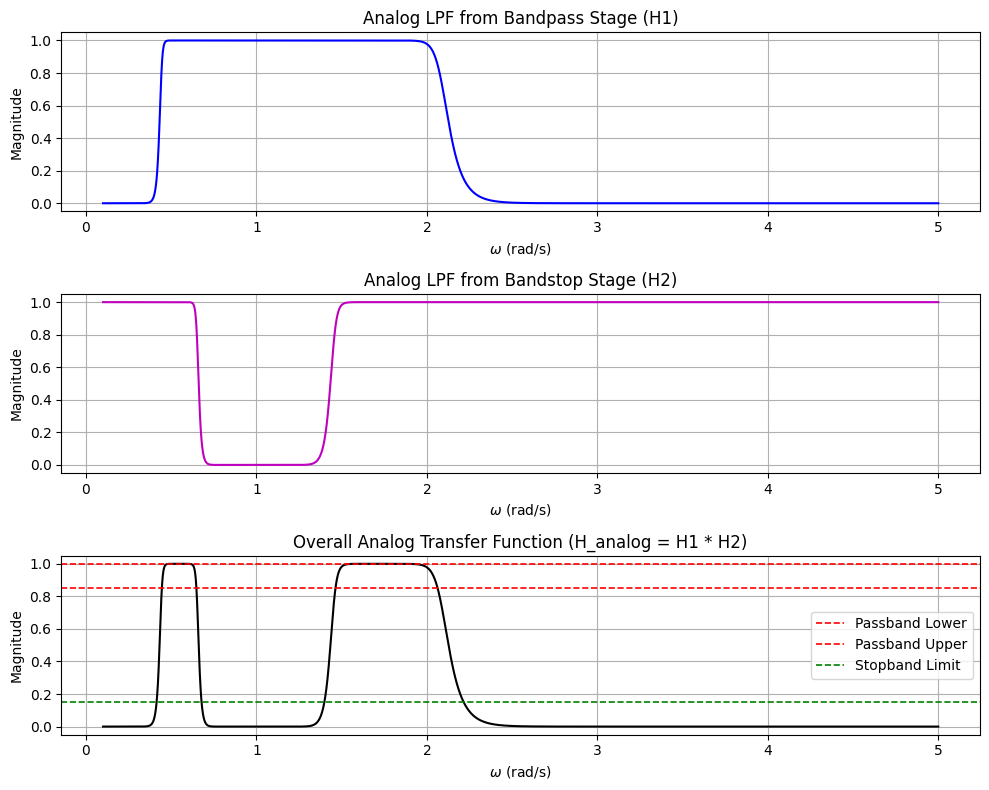

In [62]:
import numpy as np
import matplotlib.pyplot as plt

class BandPassFilter:
    """Class for designing a BandPass filter and computing its poles and frequency response."""
    
    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandpass filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))
        
        poles = np.zeros(2 * self.N, dtype=complex)
        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt((self.BandWidth * p)**2 + 4 * self.omega_0__2)
            poles[2 * i] = (self.BandWidth * p + sqrt_term) / 2.0
            poles[2 * i + 1] = (self.BandWidth * p - sqrt_term) / 2.0

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandpass filter."""
        omegaL = (omega**2 - self.omega_0__2) / (omega * self.BandWidth)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandpass filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='blue', marker='x', label='BandPass Filter Poles')

class BandStopFilter:
    """Class for designing a BandStop filter and computing its poles and frequency response."""

    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandstop filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))

        poles = np.zeros(2 * self.N, dtype=complex)
        epsilon = 1e-9  # Small value to prevent division by zero

        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt(self.BandWidth**2 + 4 * self.omega_0__2 * (p**2))
            poles[2 * i] = (-self.BandWidth + sqrt_term) / (2 * (p + epsilon))
            poles[2 * i + 1] = (-self.BandWidth - sqrt_term) / (2 * (p + epsilon))

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandstop filter."""
        omegaL = (omega * self.BandWidth) / (self.omega_0__2 - omega**2)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandstop filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='magenta', marker='o', label='BandStop Filter Poles')

class FilterAnalysis:
    """Class to analyze and plot the combined filter system."""
    
    def __init__(self, bandpass, bandstop, omega_range):
        self.bandpass = bandpass
        self.bandstop = bandstop
        self.omega = omega_range
        self.H1 = self.bandpass.butterworth_response(self.omega)
        self.H2 = self.bandstop.butterworth_response(self.omega)
        self.H_analog = self.H1 * self.H2

    def analyze_passband(self, passband_lower, passband_upper, stopband_limit):
        """Analyze the passband amplitude values and tolerance limits."""
        passband_indices = np.where((self.H_analog >= passband_lower) & (self.H_analog <= passband_upper))[0]

        if passband_indices.size > 0:
            H_passband = self.H_analog[passband_indices]
            omega_passband = self.omega[passband_indices]

            min_amp = H_passband.min()
            max_amp = H_passband.max()
            freq_min = omega_passband[np.argmin(H_passband)]
            freq_max = omega_passband[np.argmax(H_passband)]

            print("Tolerance Values:")
            print(f"  Passband lower tolerance: {passband_lower}")
            print(f"  Passband upper tolerance: {passband_upper}")
            print(f"  Stopband limit: {stopband_limit}\n")
            print("Passband Amplitude Values:")
            print(f"  Minimum amplitude: {min_amp:.4f} at ω = {freq_min:.4f} rad/s")
            print(f"  Maximum amplitude: {max_amp:.4f} at ω = {freq_max:.4f} rad/s")
        else:
            print("No frequency points were found within the passband tolerance region.")

    def print_specific_H_values(self, specific_omega_values):
        """Print specific values of the H_analog response at given omega points."""
        for omega_val in specific_omega_values:
            closest_index = np.argmin(np.abs(self.omega - omega_val))
            print(f"H_analog at ω = {self.omega[closest_index]:.3f} rad/s: {self.H_analog[closest_index]:.6f}")

    def plot_response(self, passband_lower, passband_upper, stopband_limit):
        """Plot the filter responses."""
        plt.figure(figsize=(10, 8))

        plt.subplot(3, 1, 1)
        plt.plot(self.omega, self.H1, 'b', linewidth=1.5)
        plt.title('Analog LPF from Bandpass Stage (H1)')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.subplot(3, 1, 2)
        plt.plot(self.omega, self.H2, 'm', linewidth=1.5)
        plt.title('Analog LPF from Bandstop Stage (H2)')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.subplot(3, 1, 3)
        plt.plot(self.omega, self.H_analog, 'k', linewidth=1.5)
        plt.title('Overall Analog Transfer Function (H_analog = H1 * H2)')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.axhline(passband_lower, color='r', linestyle='--', linewidth=1.2, label='Passband Lower')
        plt.axhline(passband_upper, color='r', linestyle='--', linewidth=1.2, label='Passband Upper')
        plt.axhline(stopband_limit, color='g', linestyle='--', linewidth=1.2, label='Stopband Limit')
        plt.legend()

        plt.tight_layout()
        plt.show()

# =========================
# Instantiate Filters & Analysis
# =========================
omega = np.linspace(0.1, 5, 10000)
bandpass = BandPassFilter(22, 1.04, 0.918, 1.59)
bandstop = BandStopFilter(19, 1.037, 0.94815, 0.825)
analysis = FilterAnalysis(bandpass, bandstop, omega)

analysis.analyze_passband(0.85, 1, 0.15)
analysis.print_specific_H_values([0.41, 0.45, 0.645, 0.68, 1.38, 1.47, 2.04, 2.21])
analysis.plot_response(0.85, 1, 0.15)

# Part 3

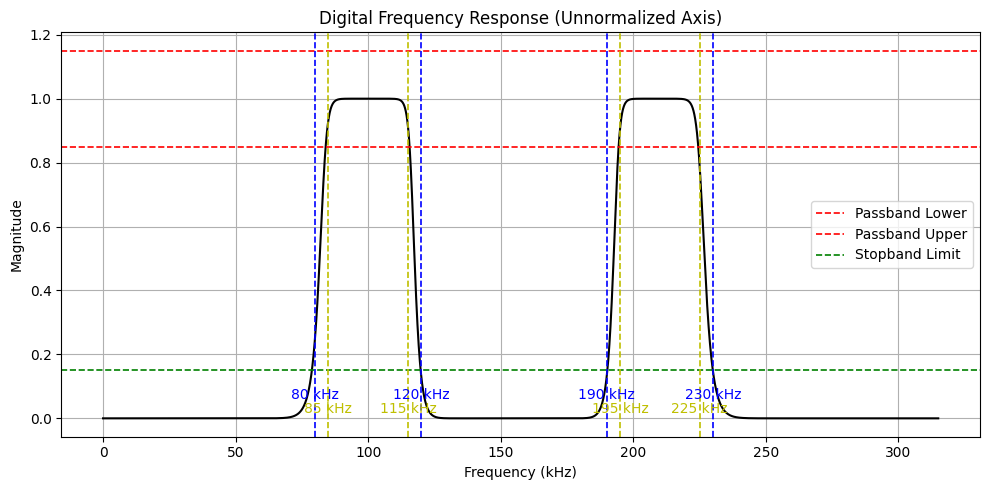

In [68]:
import numpy as np
import matplotlib.pyplot as plt

class BandPassFilter:
    """Class for designing a BandPass filter and computing its poles and frequency response."""
    
    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandpass filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))
        
        poles = np.zeros(2 * self.N, dtype=complex)
        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt((self.BandWidth * p)**2 + 4 * self.omega_0__2)
            poles[2 * i] = (self.BandWidth * p + sqrt_term) / 2.0
            poles[2 * i + 1] = (self.BandWidth * p - sqrt_term) / 2.0

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandpass filter."""
        omegaL = (omega**2 - self.omega_0__2) / (omega * self.BandWidth)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandpass filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='blue', marker='x', label='BandPass Filter Poles')

class BandStopFilter:
    """Class for designing a BandStop filter and computing its poles and frequency response."""

    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandstop filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))

        poles = np.zeros(2 * self.N, dtype=complex)
        epsilon = 1e-9  # Small value to prevent division by zero

        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt(self.BandWidth**2 + 4 * self.omega_0__2 * (p**2))
            poles[2 * i] = (-self.BandWidth + sqrt_term) / (2 * (p + epsilon))
            poles[2 * i + 1] = (-self.BandWidth - sqrt_term) / (2 * (p + epsilon))

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandstop filter."""
        omegaL = (omega * self.BandWidth) / (self.omega_0__2 - omega**2)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandstop filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='magenta', marker='o', label='BandStop Filter Poles')

class DigitalFilterAnalysis:
    """Class to analyze and plot both analog and digital filters."""

    def __init__(self, omega_range, fs):
        self.omega = omega_range
        self.fs = fs  # Sampling frequency
        self.fNyq = fs / 2.0  # Nyquist frequency

        # Compute digital frequency vector
        self.w = np.linspace(0, np.pi, 10000)
        self.Omega = np.tan(self.w / 2)  # Direct substitution

    def butterworth_response(self, omegaC, N, omega0_sq, BandWidth, filter_type):
        """Compute the Butterworth magnitude response."""
        if filter_type == "bandpass":
            omegaL = (self.omega**2 - omega0_sq) / (self.omega * BandWidth)
        elif filter_type == "bandstop":
            omegaL = (self.omega * BandWidth) / (omega0_sq - self.omega**2)
        else:
            raise ValueError("Invalid filter type!")

        return 1 / np.sqrt(1 + (omegaL / omegaC) ** (2 * N))

    def digital_response(self, omegaC, N, omega0_sq, BandWidth, filter_type):
        """Compute the digital Butterworth magnitude response using direct substitution."""
        Omega_safe = np.where(np.abs(self.Omega) > 1e-12, self.Omega, 1e-12)

        if filter_type == "bandpass":
            omegaL_sub = (Omega_safe**2 - omega0_sq) / (Omega_safe * BandWidth)
        elif filter_type == "bandstop":
            omegaL_sub = (Omega_safe * BandWidth) / (omega0_sq - Omega_safe**2)
        else:
            raise ValueError("Invalid filter type!")

        # Clip values to prevent overflow
        omegaL_sub = np.clip(omegaL_sub, -1e6, 1e6)

        return 1 / np.sqrt(1 + (omegaL_sub / omegaC) ** (2 * N))

    def analyze_and_plot(self, passband_lower, passband_upper, stopband_limit):
        """Compute and plot both analog and digital responses."""
        # Compute Analog Responses
        H1_analog = self.butterworth_response(1.04, 22, 0.918, 1.59, "bandpass")
        H2_analog = self.butterworth_response(1.037, 19, 0.94815, 0.825, "bandstop")
        H_analog = H1_analog * H2_analog

        # Compute Digital Responses
        H1_digital = self.digital_response(1.04, 22, 0.918, 1.59, "bandpass")
        H2_digital = self.digital_response(1.047, 19, 0.94815, 0.825, "bandstop")
        H_digital = H1_digital * H2_digital

        # Convert normalized digital frequency to kHz
        f_axis_khz = (self.w / np.pi) * self.fNyq / 1e3

        # Plot Responses
        plt.figure(figsize=(10, 5))

        # # Analog Response
        # plt.subplot(2, 1, 1)
        # plt.plot(self.omega, H_analog, 'k', linewidth=1.5)
        # plt.title('Overall Analog Transfer Function')
        # plt.xlabel(r'$\omega$ (rad/s)')
        # plt.ylabel('Magnitude')
        # plt.grid(True)

        # Digital Response
        # plt.subplot(2, 1, 2)
        plt.plot(f_axis_khz, H_digital, 'k', linewidth=1.5)
        plt.title('Digital Frequency Response (Unnormalized Axis)')
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        # Specification Lines
        plt.axhline(passband_lower, color='r', linestyle='--', linewidth=1.2, label='Passband Lower')
        plt.axhline(passband_upper, color='r', linestyle='--', linewidth=1.2, label='Passband Upper')
        plt.axhline(stopband_limit, color='g', linestyle='--', linewidth=1.2, label='Stopband Limit')

        # Mark Frequencies
        frequencies_to_mark = [80, 120, 190, 230]  # in kHz
        for f in frequencies_to_mark:
            plt.axvline(x=f, color='b', linestyle='--', linewidth=1.2)
            plt.text(f, 0.05, f'{f} kHz', color='b', ha='center', va='bottom', fontsize=10)

        frequencies_to_mark = [85, 115, 195, 225]  # in kHz
        for f in frequencies_to_mark:
            plt.axvline(x=f, color='y', linestyle='--', linewidth=1.2)
            plt.text(f, 0.05, f'{f} kHz', color='y', ha='center', va='top', fontsize=10)

        plt.legend()
        plt.tight_layout()
        plt.show()


# =========================
# Run Filter Analysis
# =========================
fs = 630e3  # Sampling frequency
omega = np.linspace(0.1, 5, 10000)  # Frequency range

analysis = DigitalFilterAnalysis(omega, fs)
analysis.analyze_and_plot(0.85, 1.15, 0.15)

# Combined

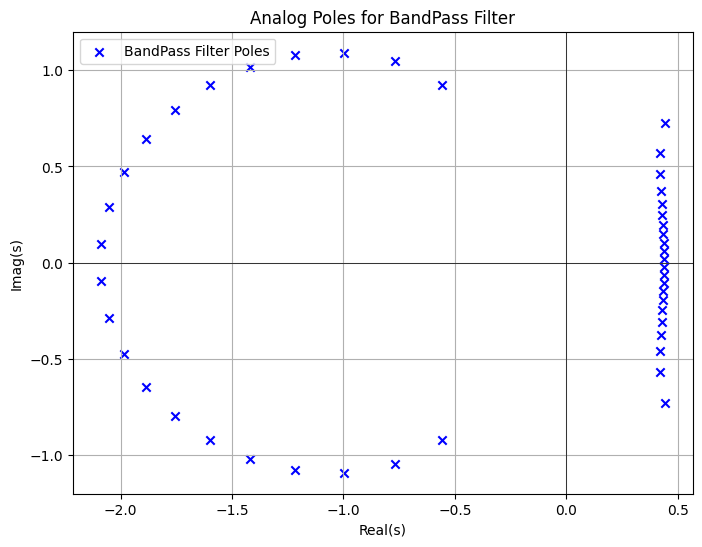

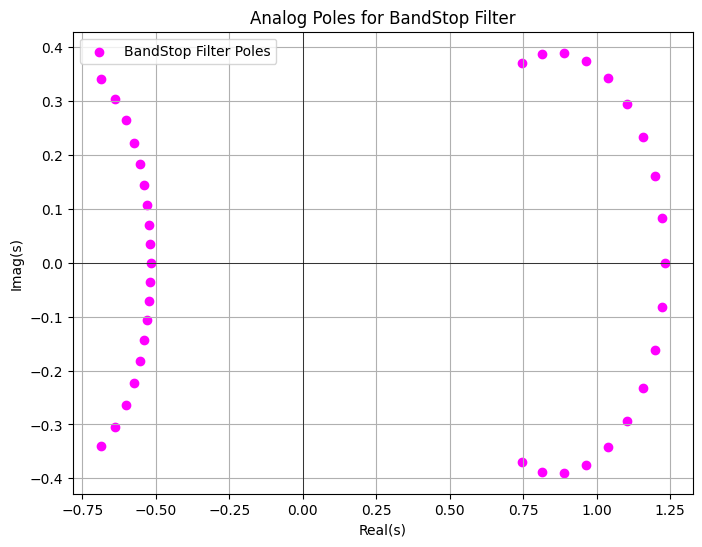

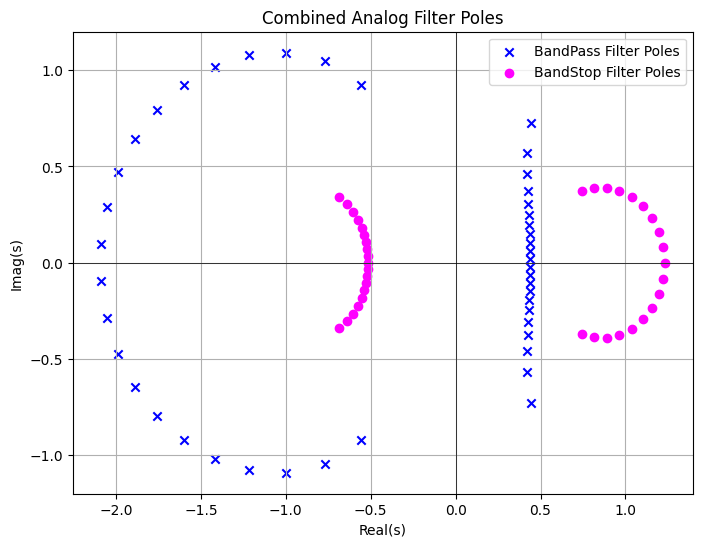

Tolerance Values:
  Passband lower tolerance: 0.85
  Passband upper tolerance: 1
  Stopband limit: 0.15

Passband Amplitude Values:
  Minimum amplitude: 0.8502 at ω = 0.4450 rad/s
  Maximum amplitude: 1.0000 at ω = 0.5425 rad/s
H_analog at ω = 0.410 rad/s: 0.109847
H_analog at ω = 0.450 rad/s: 0.920211
H_analog at ω = 0.645 rad/s: 0.894803
H_analog at ω = 0.680 rad/s: 0.125947
H_analog at ω = 1.380 rad/s: 0.072332
H_analog at ω = 1.470 rad/s: 0.894967
H_analog at ω = 2.040 rad/s: 0.921093
H_analog at ω = 2.210 rad/s: 0.162675


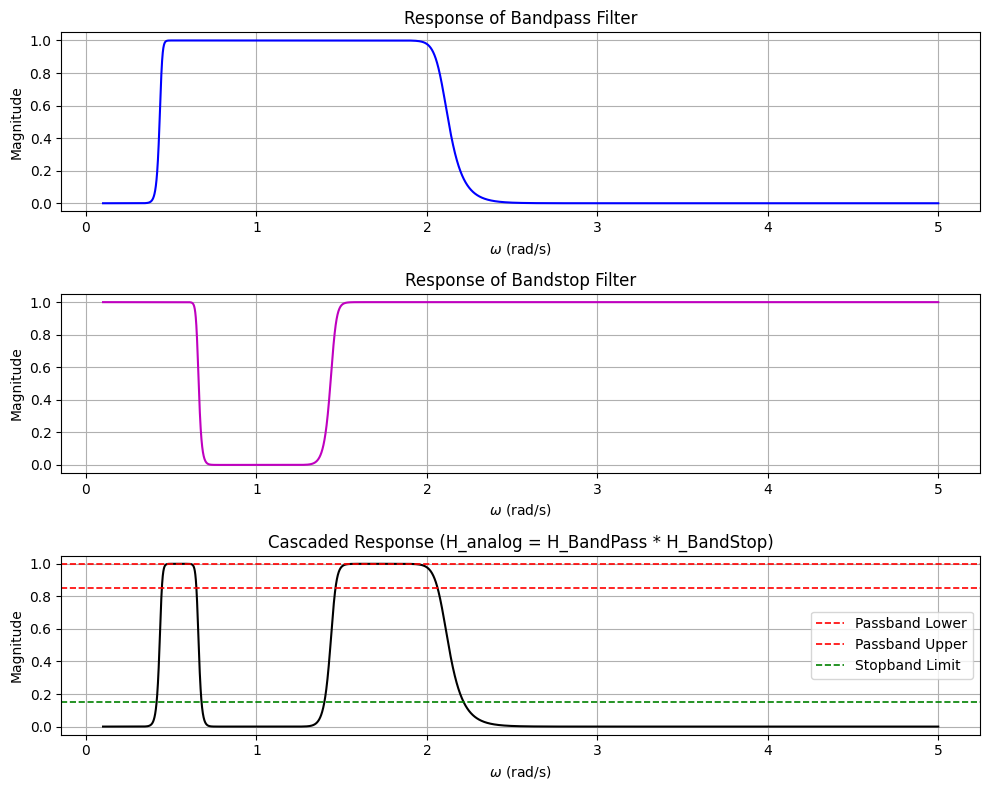

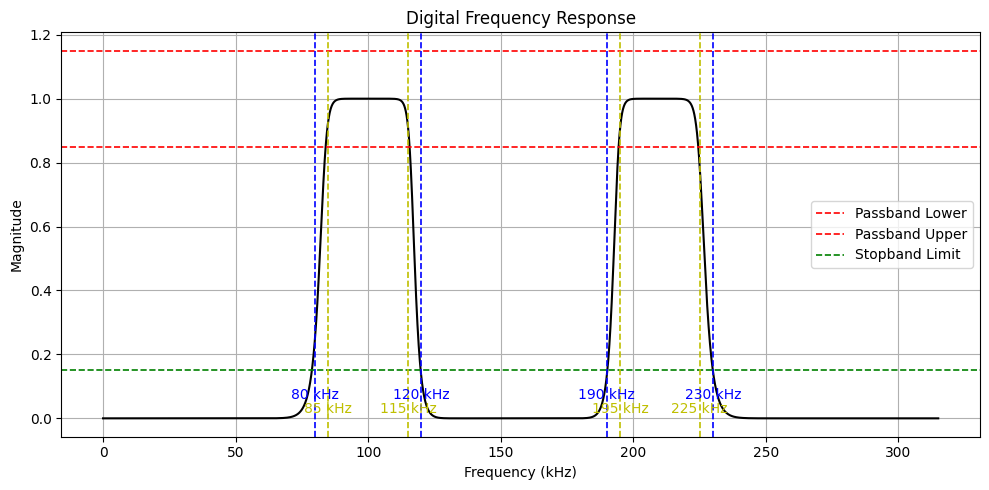

In [80]:
import numpy as np
import matplotlib.pyplot as plt

class BandPassFilter:
    """Class for designing a BandPass filter and computing its poles and frequency response."""
    
    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandpass filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))
        
        poles = np.zeros(2 * self.N, dtype=complex)
        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt((self.BandWidth * p)**2 + 4 * self.omega_0__2)
            poles[2 * i] = (self.BandWidth * p + sqrt_term) / 2.0
            poles[2 * i + 1] = (self.BandWidth * p - sqrt_term) / 2.0

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandpass filter."""
        omegaL = (omega**2 - self.omega_0__2) / (omega * self.BandWidth)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandpass filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='blue', marker='x', label='BandPass Filter Poles')

class BandStopFilter:
    """Class for designing a BandStop filter and computing its poles and frequency response."""

    def __init__(self, N, omega_C, omega_0__2, BandWidth):
        self.N = N
        self.omega_C = omega_C
        self.omega_0__2 = omega_0__2
        self.BandWidth = BandWidth
        self.poles = self.compute_poles()

    def compute_poles(self):
        """Compute the bandstop filter poles."""
        k = np.arange(self.N)
        poles_lowpass = self.omega_C * np.exp(1j * (np.pi/2 + (2*k + 1)*np.pi/(2*self.N)))

        poles = np.zeros(2 * self.N, dtype=complex)
        epsilon = 1e-9  # Small value to prevent division by zero

        for i, p in enumerate(poles_lowpass):
            sqrt_term = np.lib.scimath.sqrt(self.BandWidth**2 + 4 * self.omega_0__2 * (p**2))
            poles[2 * i] = (-self.BandWidth + sqrt_term) / (2 * (p + epsilon))
            poles[2 * i + 1] = (-self.BandWidth - sqrt_term) / (2 * (p + epsilon))

        return poles

    def butterworth_response(self, omega):
        """Compute the Butterworth magnitude response for the bandstop filter."""
        omegaL = (omega * self.BandWidth) / (self.omega_0__2 - omega**2)
        return 1 / np.sqrt(1 + (omegaL / self.omega_C) ** (2 * self.N))

    def plot_poles(self):
        """Plot the poles of the bandstop filter."""
        plt.scatter(np.real(self.poles), np.imag(self.poles), color='magenta', marker='o', label='BandStop Filter Poles')

class FilterSystem:
    """Class that combines both filters into a single system."""
    
    def __init__(self, bandpass_filter, bandstop_filter):
        self.bandpass_filter = bandpass_filter
        self.bandstop_filter = bandstop_filter
        self.poles_combined = np.concatenate((bandpass_filter.poles, bandstop_filter.poles))

    def plot_poles(self):
        """Plot the poles of the combined filter system."""
        plt.figure(figsize=(8, 6))
        bandpass.plot_poles()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title('Analog Poles for BandPass Filter')
        plt.xlabel('Real(s)')
        plt.ylabel('Imag(s)')
        plt.grid(True)
        plt.legend()
        plt.show()
        
        plt.figure(figsize=(8, 6))
        bandstop.plot_poles()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title('Analog Poles for BandStop Filter')
        plt.xlabel('Real(s)')
        plt.ylabel('Imag(s)')
        plt.grid(True)
        plt.legend()
        plt.show()

        plt.figure(figsize=(8, 6))
        self.bandpass_filter.plot_poles()
        self.bandstop_filter.plot_poles()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.title('Combined Analog Filter Poles')
        plt.xlabel('Real(s)')
        plt.ylabel('Imag(s)')
        plt.grid(True)
        plt.legend()
        plt.show()

bandpass = BandPassFilter(N=22, omega_C=1.04, omega_0__2=0.918, BandWidth=1.59)
bandstop = BandStopFilter(N=19, omega_C=1.037, omega_0__2=0.6375, BandWidth=0.74)
filter_system.plot_poles()

class FilterAnalysis:
    """Class to analyze and plot the combined filter system."""
    
    def __init__(self, bandpass, bandstop, omega_range):
        self.bandpass = bandpass
        self.bandstop = bandstop
        self.omega = omega_range
        self.H1 = self.bandpass.butterworth_response(self.omega)
        self.H2 = self.bandstop.butterworth_response(self.omega)
        self.H_analog = self.H1 * self.H2

    def analyze_passband(self, passband_lower, passband_upper, stopband_limit):
        """Analyze the passband amplitude values and tolerance limits."""
        passband_indices = np.where((self.H_analog >= passband_lower) & (self.H_analog <= passband_upper))[0]

        if passband_indices.size > 0:
            H_passband = self.H_analog[passband_indices]
            omega_passband = self.omega[passband_indices]

            min_amp = H_passband.min()
            max_amp = H_passband.max()
            freq_min = omega_passband[np.argmin(H_passband)]
            freq_max = omega_passband[np.argmax(H_passband)]

            print("Tolerance Values:")
            print(f"  Passband lower tolerance: {passband_lower}")
            print(f"  Passband upper tolerance: {passband_upper}")
            print(f"  Stopband limit: {stopband_limit}\n")
            print("Passband Amplitude Values:")
            print(f"  Minimum amplitude: {min_amp:.4f} at ω = {freq_min:.4f} rad/s")
            print(f"  Maximum amplitude: {max_amp:.4f} at ω = {freq_max:.4f} rad/s")
        else:
            print("No frequency points were found within the passband tolerance region.")

    def print_specific_H_values(self, specific_omega_values):
        """Print specific values of the H_analog response at given omega points."""
        for omega_val in specific_omega_values:
            closest_index = np.argmin(np.abs(self.omega - omega_val))
            print(f"H_analog at ω = {self.omega[closest_index]:.3f} rad/s: {self.H_analog[closest_index]:.6f}")

    def plot_response(self, passband_lower, passband_upper, stopband_limit):
        """Plot the filter responses."""
        plt.figure(figsize=(10, 8))

        plt.subplot(3, 1, 1)
        plt.plot(self.omega, self.H1, 'b', linewidth=1.5)
        plt.title('Response of Bandpass Filter')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.subplot(3, 1, 2)
        plt.plot(self.omega, self.H2, 'm', linewidth=1.5)
        plt.title('Response of Bandstop Filter')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.subplot(3, 1, 3)
        plt.plot(self.omega, self.H_analog, 'k', linewidth=1.5)
        plt.title('Cascaded Response (H_analog = H_BandPass * H_BandStop)')
        plt.xlabel(r'$\omega$ (rad/s)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        plt.axhline(passband_lower, color='r', linestyle='--', linewidth=1.2, label='Passband Lower')
        plt.axhline(passband_upper, color='r', linestyle='--', linewidth=1.2, label='Passband Upper')
        plt.axhline(stopband_limit, color='g', linestyle='--', linewidth=1.2, label='Stopband Limit')
        plt.legend()

        plt.tight_layout()
        plt.show()

omega = np.linspace(0.1, 5, 10000)
bandpass = BandPassFilter(22, 1.04, 0.918, 1.59)
bandstop = BandStopFilter(19, 1.037, 0.94815, 0.825)
analysis = FilterAnalysis(bandpass, bandstop, omega)

analysis.analyze_passband(0.85, 1, 0.15)
analysis.print_specific_H_values([0.41, 0.45, 0.645, 0.68, 1.38, 1.47, 2.04, 2.21])
analysis.plot_response(0.85, 1, 0.15)

class DigitalFilterAnalysis:
    def __init__(self, omega_range, fs):
        self.omega = omega_range
        self.fs = fs  # Sampling frequency
        self.fNyq = fs / 2.0  # Nyquist frequency
        self.w = np.linspace(0, np.pi, 10000)
        self.Omega = np.tan(self.w / 2)

    def butterworth_response(self, omegaC, N, omega0_sq, BandWidth, filter_type):
        """Compute the Butterworth magnitude response."""
        if filter_type == "bandpass":
            omegaL = (self.omega**2 - omega0_sq) / (self.omega * BandWidth)
        elif filter_type == "bandstop":
            omegaL = (self.omega * BandWidth) / (omega0_sq - self.omega**2)
        return 1 / np.sqrt(1 + (omegaL / omegaC) ** (2 * N))

    def digital_response(self, omegaC, N, omega0_sq, BandWidth, filter_type):
        """Compute the digital Butterworth magnitude response using direct substitution."""
        Omega_safe = np.where(np.abs(self.Omega) > 1e-12, self.Omega, 1e-12)
        if filter_type == "bandpass":
            omegaL_sub = (Omega_safe**2 - omega0_sq) / (Omega_safe * BandWidth)
        elif filter_type == "bandstop":
            omegaL_sub = (Omega_safe * BandWidth) / (omega0_sq - Omega_safe**2)
        omegaL_sub = np.clip(omegaL_sub, -1e6, 1e6)
        return 1 / np.sqrt(1 + (omegaL_sub / omegaC) ** (2 * N))

    def analyze_and_plot(self, passband_lower, passband_upper, stopband_limit):
        # Compute Digital Responses
        H1_digital = self.digital_response(1.04, 22, 0.918, 1.59, "bandpass")
        H2_digital = self.digital_response(1.047, 19, 0.94815, 0.825, "bandstop")
        H_digital = H1_digital * H2_digital

        # Convert normalized digital frequency to kHz
        f_axis_khz = (self.w / np.pi) * self.fNyq / 1e3

        # Plot Responses
        plt.figure(figsize=(10, 5))
        plt.plot(f_axis_khz, H_digital, 'k', linewidth=1.5)
        plt.title('Digital Frequency Response')
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Magnitude')
        plt.grid(True)

        # Specification Lines
        plt.axhline(passband_lower, color='r', linestyle='--', linewidth=1.2, label='Passband Lower')
        plt.axhline(passband_upper, color='r', linestyle='--', linewidth=1.2, label='Passband Upper')
        plt.axhline(stopband_limit, color='g', linestyle='--', linewidth=1.2, label='Stopband Limit')

        # Mark Frequencies
        frequencies_to_mark = [80, 120, 190, 230]  # in kHz
        for f in frequencies_to_mark:
            plt.axvline(x=f, color='b', linestyle='--', linewidth=1.2)
            plt.text(f, 0.05, f'{f} kHz', color='b', ha='center', va='bottom', fontsize=10)

        frequencies_to_mark = [85, 115, 195, 225]  # in kHz
        for f in frequencies_to_mark:
            plt.axvline(x=f, color='y', linestyle='--', linewidth=1.2)
            plt.text(f, 0.05, f'{f} kHz', color='y', ha='center', va='top', fontsize=10)

        plt.legend()
        plt.tight_layout()
        plt.show()

fs = 630e3  # Sampling frequency
omega = np.linspace(0.1, 5, 10000)  # Frequency range
analysis = DigitalFilterAnalysis(omega, fs)
analysis.analyze_and_plot(0.85, 1.15, 0.15)